In [1]:
import numpy as np
import pandas as pd
import talib

In [2]:
data = pd.read_csv('./루닛 주식 데이터.csv', encoding='euc-kr')
dataCp = data.copy()
# dataCp.drop(['거래대금','누적체결매도수량','누적체결매수수량'], axis=1, inplace=True)
dataCp

,종목코드,종목명,날짜,시간,시가,고가,저가,종가,거래량
0,A328130,루닛,20220721,1530,40000.0,40000.0,40000.0,40000.0,3586045.0
1,A328130,루닛,20220721,1520,39800.0,40000.0,39500.0,40000.0,3586045.0
2,A328130,루닛,20220721,1519,39750.0,39950.0,39550.0,39850.0,3543452.0
3,A328130,루닛,20220721,1518,39850.0,40000.0,39700.0,39750.0,3528384.0
4,A328130,루닛,20220721,1517,39750.0,40000.0,39700.0,39850.0,3488063.0
...,...,...,...,...,...,...,...,...,...
90221,A328130,루닛,20230717,905,172200.0,174300.0,171100.0,173800.0,37178.0
90222,A328130,루닛,20230717,904,174000.0,174000.0,172000.0,172200.0,30125.0
90223,A328130,루닛,20230717,903,174100.0,174500.0,173600.0,174000.0,19916.0
90224,A328130,루닛,20230717,902,174600.0,175100.0,173000.0,174400.0,14557.0


In [4]:
# SMA5 -> 5일동안 이동평균
# upper, middle, lower -> 볼린저 밴드
# RSI -> 상대강도지수
# MACD -> 이동 평균 수렴 발산
# AROON -> 기간의 최고점과 최저점을 분석하여 추세의 강도와 방향을 측정하는 추세 추종 지표
dataCp['SMA5'] = talib.SMA(dataCp['종가'], timeperiod=5)
dataCp['SMA20'] = talib.SMA(dataCp['종가'], timeperiod=10)
upper, middle, lower = talib.BBANDS(dataCp['종가'], timeperiod=20)
dataCp['UPPER'] = upper
dataCp['MAVG'] = middle
dataCp['LOWER'] = lower
dataCp['RSI'] = talib.RSI(dataCp['종가'], timeperiod=14)
macd, macdsignal, macdhist = talib.MACD(dataCp['종가'], fastperiod=12, slowperiod=26, signalperiod=9)
dataCp['MACD'] = macd
ar_up, ar_dn = talib.AROON(dataCp['고가'], dataCp['저가'], timeperiod=14)
dataCp['AROONUP'] = ar_up
dataCp['AROONDN'] = ar_dn

c:\Users\PC\anaconda3\envs\pandas-dev\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\PC\anaconda3\envs\pandas-dev\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\PC\anaconda3\envs\pandas-dev\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\PC\anaconda3\envs\pandas-dev\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\PC\anaconda3\envs\pandas-dev\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\PC\anaconda3\envs\pandas-dev\lib\site-packages\matp

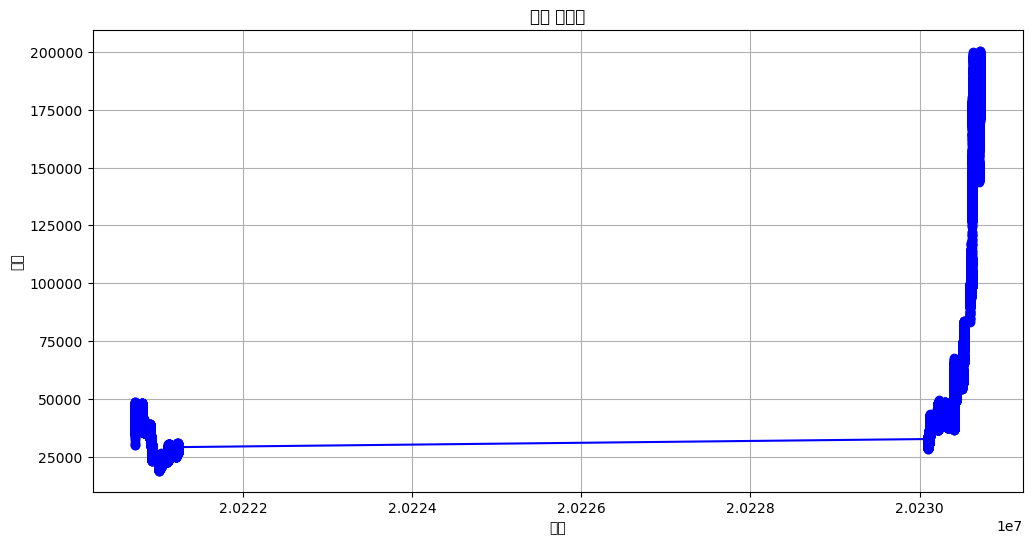

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# CSV 파일 경로 지정
csv_file_path = './루닛 주식 데이터.csv'

# CSV 파일 읽기 (날짜 컬럼을 파싱하여 날짜 형식으로 변환)
df = pd.read_csv(csv_file_path, parse_dates=['날짜_컬럼_이름'])

# 시계열 데이터가 있는 컬럼과 날짜 컬럼 선택
time_series_column = '시계열_데이터_컬럼_이름'
date_column = '날짜_컬럼_이름'

# 시계열 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df[date_column], df[time_series_column], marker='o', linestyle='-', color='b')
plt.xlabel('날짜')
plt.ylabel('데이터 값')
plt.title('시계열 그래프')

# x 축의 눈금 간격 설정 (예: 하루 단위로 눈금 표시)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

# x 축의 눈금 표시 형식 설정 (예: "%Y-%m-%d" 형식으로 표시)
plt.gca


In [5]:
dataCp

,종목코드,종목명,날짜,시간,시가,고가,저가,종가,거래량,SMA5,SMA20,UPPER,MAVG,LOWER,RSI,MACD,AROONUP,AROONDN
0,A328130,루닛,20220721,1530,40000.0,40000.0,40000.0,40000.0,3586045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A328130,루닛,20220721,1520,39800.0,40000.0,39500.0,40000.0,3586045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A328130,루닛,20220721,1519,39750.0,39950.0,39550.0,39850.0,3543452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A328130,루닛,20220721,1518,39850.0,40000.0,39700.0,39750.0,3528384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A328130,루닛,20220721,1517,39750.0,40000.0,39700.0,39850.0,3488063.0,39890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90221,A328130,루닛,20230717,905,172200.0,174300.0,171100.0,173800.0,37178.0,175100.0,176960.0,181501.311193,177735.0,173968.688807,33.349690,-629.020578,100.000000,42.857143
90222,A328130,루닛,20230717,904,174000.0,174000.0,172000.0,172200.0,30125.0,174220.0,176240.0,181971.579406,177515.0,173058.420594,28.631469,-917.030007,92.857143,35.714286
90223,A328130,루닛,20230717,903,174100.0,174500.0,173600.0,174000.0,19916.0,173660.0,175640.0,182063.173029,177350.0,172636.826971,39.074422,-988.638192,85.714286,28.571429
90224,A328130,루닛,20230717,902,174600.0,175100.0,173000.0,174400.0,14557.0,173620.0,175180.0,181961.190330,177130.0,172298.809670,41.135719,-1001.566107,78.571429,21.428571


In [23]:
# 볼린저밴드 http://blog.quantylab.com/ta_lib.html
# https://nonmeyet.tistory.com/entry/Python-TALib%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8%EC%A3%BC%EA%B0%80%EA%B8%B0%EC%88%A0%EB%B6%84%EC%84%9D-%EB%B3%B4%EC%A1%B0%EC%A7%80%ED%91%9C-%EC%B6%94%EA%B0%80

In [6]:
dataCp.fillna(method='bfill', inplace=True)

In [8]:
dataCp.isnull().sum()

종목코드       0
종목명        0
날짜         0
시간         0
시가         0
고가         0
저가         0
종가         0
거래량        0
SMA5       0
SMA20      0
UPPER      0
MAVG       0
LOWER      0
RSI        0
MACD       0
AROONUP    0
AROONDN    0
dtype: int64

In [10]:
dataCp.to_csv('./루닛지표추가data.csv', index=False, encoding='cp949')